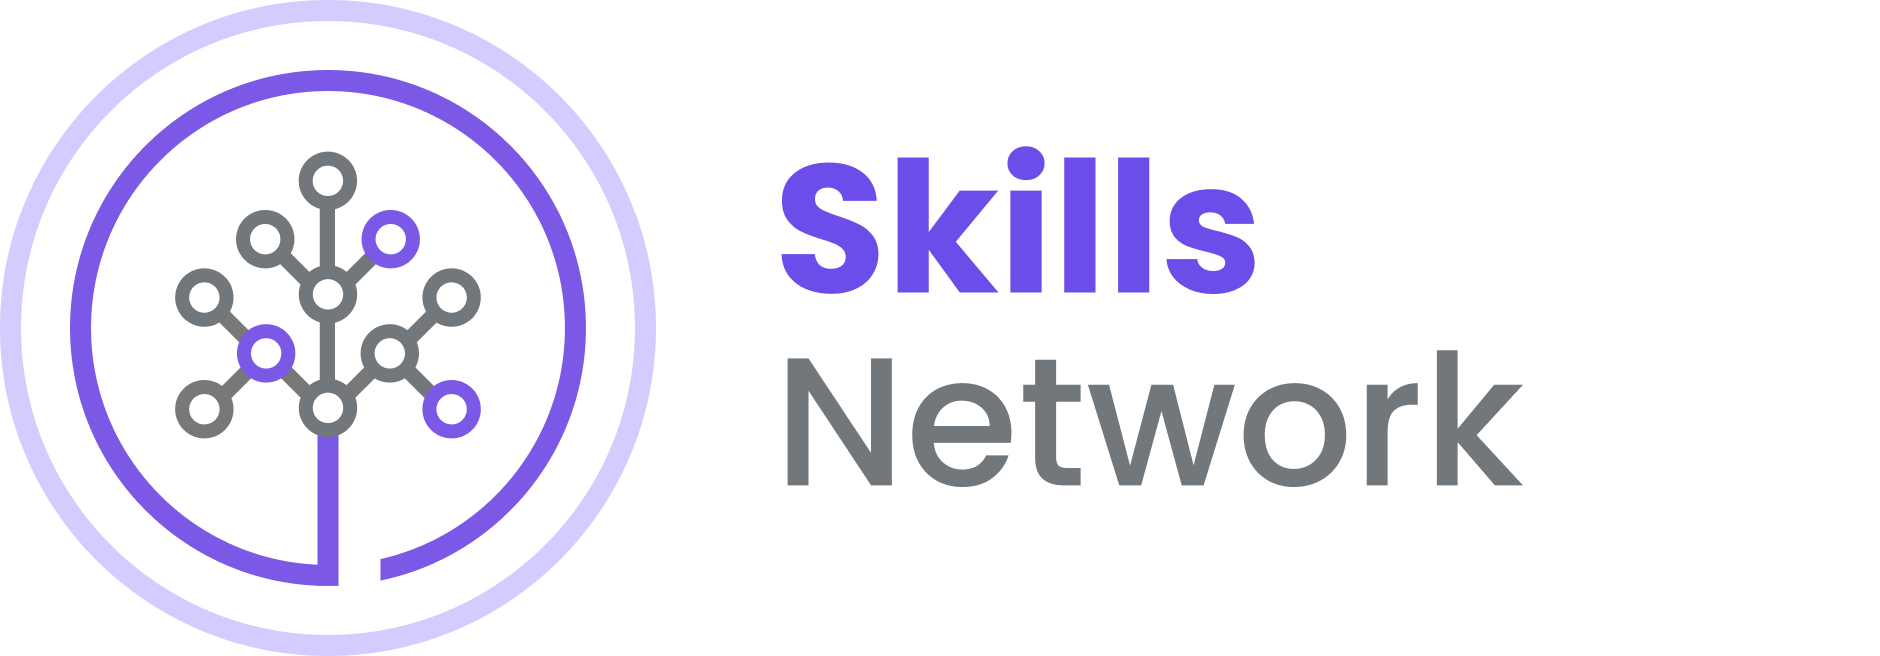

# Peer Review Assignment - Data Engineer - ETL


Estimated time needed: **20** minutes


## Objectives

In this final part you will:

*   Run the ETL process
*   Extract bank and market cap data from the JSON file `bank_market_cap.json`
*   Transform the market cap currency using the exchange rate data
*   Load the transformed data into a seperate CSV


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.


In [ ]:
#!pip install glob
#!pip install pandas
#!pip install requests
#!pip install datetime

## Imports

Import any additional libraries you may need here.


In [1]:
import glob
import pandas as pd
from datetime import datetime

As the exchange rate fluctuates, we will download the same dataset to make marking simpler. This will be in the same format as the dataset you used in the last section


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/bank_market_cap_1.json
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/bank_market_cap_2.json
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Final%20Assignment/exchange_rates.csv

--2021-12-18 10:25:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/bank_market_cap_1.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2815 (2.7K) [application/json]
Saving to: ‘bank_market_cap_1.json’

bank_market_cap_1.j 100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-12-18 10:25:37 (111 MB/s) - ‘bank_market_cap_1.json’ saved [2815/2815]

--2021-12-18 10:25:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Tran

## Extract


### JSON Extract Function

This function will extract JSON files.


In [3]:
def extract_from_json(file_to_process):
    dataframe = pd.read_json(file_to_process)
    return dataframe

## Extract Function

Define the extract function that finds JSON file `bank_market_cap_1.json` and calls the function created above to extract data from them. Store the data in a `pandas` dataframe. Use the following list for the columns.


In [4]:
columns=['Name','Market Cap (US$ Billion)']

In [14]:
def extract():
    # Write your code here
    extracted_data = pd.DataFrame(columns=['Name','Market Cap (US$ Billion)'])
    
    # Process json file
    for jsonfile in glob.glob("*.json"):
        extracted_data = extracted_data.append(extract_from_json(jsonfile), ignore_index=True)
        
    return extracted_data

<b>Question 1</b> Load the file <code>exchange_rates.csv</code> as a dataframe and find the exchange rate for British pounds with the symbol <code>GBP</code>, store it in the variable  <code>exchange_rate</code>, you will be asked for the number. Hint: set the parameter  <code>index_col</code> to 0.


In [28]:
# Write your code here
#log("Extract phase Started")
extracted_data = extract()
#log("Extract phase Ended")
extracted_data

,Name,Market Cap (US$ Billion)
0,Banco Bilbao Vizcaya Argentaria,60.678
1,Japan Post Bank,60.525
2,The Bank of New York Mellon,59.823
3,Shanghai Pudong Development Bank,58.796
4,Industrial Bank (China),57.388
...,...,...
100,Ping An Bank,37.993
101,Standard Chartered,37.319
102,United Overseas Bank,35.128
103,QNB Group,33.560


## Transform

Using <code>exchange_rate</code> and the `exchange_rates.csv` file find the exchange rate of USD to GBP. Write a transform function that

1.  Changes the `Market Cap (US$ Billion)` column from USD to GBP
2.  Rounds the Market Cap (US$ Billion)\` column to 3 decimal places
3.  Rename `Market Cap (US$ Billion)` to `Market Cap (GBP$ Billion)`


In [37]:
def transform(data):
    # Write your code here
    data['Market Cap (US$ Billion)'] = round(0.75 * data['Market Cap (US$ Billion)'], 3)
    data.rename(columns={'Market Cap (US$ Billion)': 'Market Cap (GBP$ Billion)'}, inplace=True)
    return data

transformed_data = transform(extracted_data)
transformed_data

,Name,Market Cap (GBP$ Billion)
0,Banco Bilbao Vizcaya Argentaria,45.508
1,Japan Post Bank,45.394
2,The Bank of New York Mellon,44.867
3,Shanghai Pudong Development Bank,44.097
4,Industrial Bank (China),43.041
...,...,...
100,Ping An Bank,28.495
101,Standard Chartered,27.989
102,United Overseas Bank,26.346
103,QNB Group,25.170


## Load

Create a function that takes a dataframe and load it to a csv named `bank_market_cap_gbp.csv`. Make sure to set `index` to `False`.


In [46]:
def load(target_file, data_to_load):
    # Write your code here
    data_to_load.to_csv(target_file, index=False) 

## Logging Function


Write the logging function <code>log</code> to log your data:


In [33]:
def log(message):
    # Write your code here
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("logfile.txt","a") as f:
        f.write(timestamp + ',' + message + '\n')

## Running the ETL Process


Log the process accordingly using the following <code>"ETL Job Started"</code> and <code>"Extract phase Started"</code>


In [34]:
# Write your code here
log("ETL Job Started")
log("Extract phase Started")

### Extract


<code>Question 2</code> Use the function <code>extract</code>, and print the first 5 rows, take a screen shot:


In [38]:
# Call the function here
extracted_data = extract()
# Print the rows here
extracted_data.head()

,Name,Market Cap (US$ Billion)
0,Banco Bilbao Vizcaya Argentaria,60.678
1,Japan Post Bank,60.525
2,The Bank of New York Mellon,59.823
3,Shanghai Pudong Development Bank,58.796
4,Industrial Bank (China),57.388


Log the data as <code>"Extract phase Ended"</code>


In [36]:
# Write your code here
log("Extract phase Ended")

### Transform


Log the following  <code>"Transform phase Started"</code>


In [39]:
# Write your code here
log("Transform phase Started")

<code>Question 3</code> Use the function <code>transform</code> and print the first 5 rows of the output, take a screen shot:


In [40]:
# Call the function here
transformed_data = transform(extracted_data)
# Print the first 5 rows here
transformed_data.head()

,Name,Market Cap (GBP$ Billion)
0,Banco Bilbao Vizcaya Argentaria,45.508
1,Japan Post Bank,45.394
2,The Bank of New York Mellon,44.867
3,Shanghai Pudong Development Bank,44.097
4,Industrial Bank (China),43.041


Log your data <code>"Transform phase Ended"</code>


In [41]:
# Write your code here
log("Transform phase Ended")

### Load


Log the following `"Load phase Started"`.


In [42]:
# Write your code here
log("Load phase Started")

Call the load function


In [47]:
# Write your code here
load('market_cap.csv', transformed_data)

Log the following `"Load phase Ended"`.


In [48]:
# Write your code here
log("Load phase Ended")

## Authors


Ramesh Sannareddy, Joseph Santrcangelo and Azim Hirjani


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-11-25        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
